### **Nabila Adawy**


n.roshdy@innopolis.university


B19-RO-01 

### **Digital Signal Processing**


### **Home Assignment 2**

### **Libraries**

In [57]:
import numpy as np
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy import signal
import math

# Task 1

### Poles and zeros of the system function H(z)

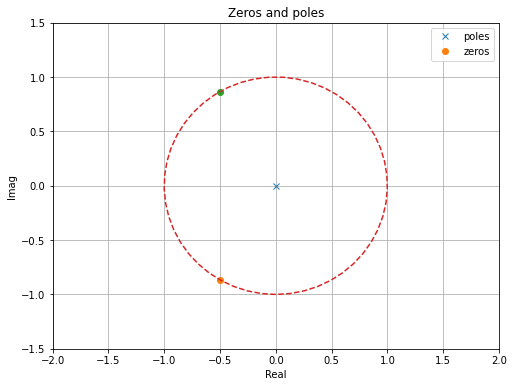

In [58]:
angle = np.linspace(-np.pi,np.pi,50)
cirx = np.sin(angle)
ciry = np.cos(angle)
plt.figure(figsize=(8,6))
plt.title("Zeros and poles")
plt.plot(0,0,'x', -0.5,-np.sqrt(3)/2,'o', -0.5,np.sqrt(3)/2,'o', cirx,ciry,'--')
plt.grid()
plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-1.5, 1.5))
plt.ylabel('Imag')
plt.legend(['poles','zeros'])
plt.show()

### Magnitude and Argument of H(z) in Frequency Domain

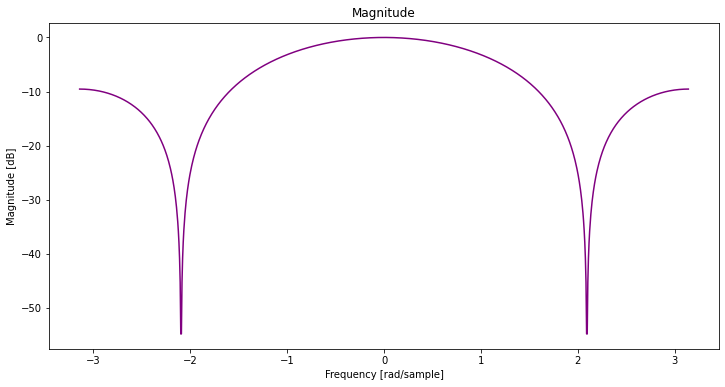

In [59]:
w = np.linspace(-np.pi, np.pi, 1000)
h = []
for x in w:
    z = np.exp(-x*complex(0,1))
    # H = (1/3)*(pow(z,3)-1)/(pow(z,2)*(z-1))
    H = (1/3)*z*(1+2*np.cos(x))
    h.append(H)
h = np.array(h)

plt.figure(figsize=(12,6))
plt.plot(w, 20*np.log10(abs(h)), color='purple')
plt.title("Magnitude")
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')
plt.show()

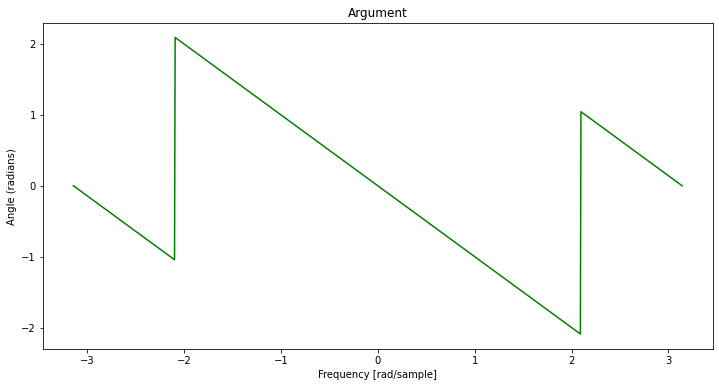

In [60]:
angles = np.unwrap(np.angle(h))
plt.figure(figsize=(12,6))
plt.plot(w, angles,color='green')
plt.title("Argument")
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency [rad/sample]')
plt.show()

### Moving Average Filter for any M with 30 Samples

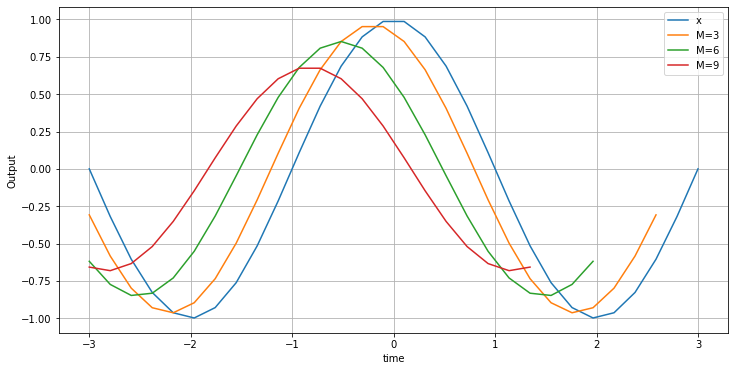

In [61]:
def moving_average(x,M):
  conv = np.convolve(x, np.ones(M), 'valid') / M
  return conv 
  
sample = np.linspace(-3, 3, 30)
x = []
for i in sample:
  x.append(np.cos(np.pi*i/2))

plt.figure(figsize=(12,6))
plt.plot(sample,x)
plt.plot(sample[0:-2],moving_average(x,3))
plt.plot(sample[0:-5],moving_average(x,6))
plt.plot(sample[0:-8],moving_average(x,9))
plt.grid()
plt.legend(['x','M=3','M=6','M=9'])
plt.xlabel('time')
plt.ylabel('Output')
plt.show()

# Task 2

## **Bartlett Window**

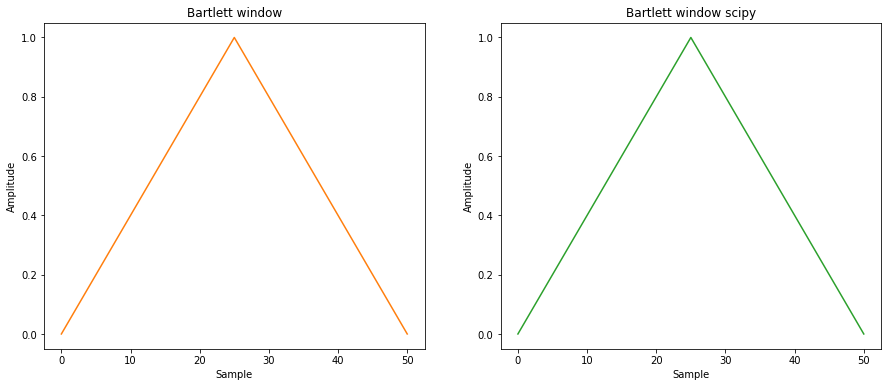

In [62]:
M = 51
bar_win = []
# bar_win = np.bartlett(M)
for n in range(M):
    win = (2/(M-1))*(((M-1)/2)-np.abs(n-(M-1)/2))
    bar_win.append(win)

window = signal.windows.bartlett(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(bar_win, 'tab:orange')
ax1.set_title("Bartlett window")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Sample")
ax2.plot(window, 'tab:green')
ax2.set_title("Bartlett window scipy")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Sample")
plt.show()

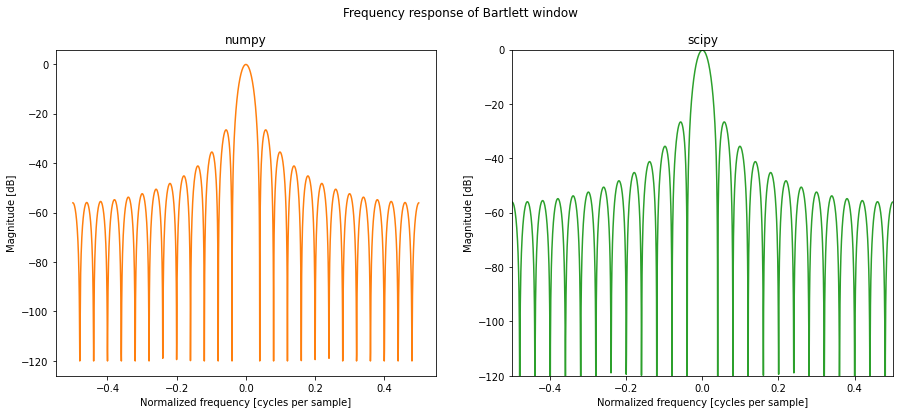

In [63]:
A = fft(bar_win, 2048) / 25.5
mag = np.abs(fftshift(A))
freq1 = np.linspace(-0.5, 0.5, len(A))
response1 = 20 * np.log10(mag)
response1 = np.clip(response1, -120, 100)

A = fft(window, 2048) / 25.5
freq2 = np.linspace(-0.5, 0.5, len(A))
response2 = 20 * np.log10(np.abs(fftshift(A)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(freq1, response1, 'tab:orange')
fig.suptitle('Frequency response of Bartlett window')
ax1.set_title("numpy")
ax1.set_ylabel("Magnitude [dB]")
ax1.set_xlabel("Normalized frequency [cycles per sample]")
ax2.plot(freq2, response2, 'tab:green')
ax2.set_title("scipy")
ax2.set_ylabel("Magnitude [dB]")
ax2.set_xlabel("Normalized frequency [cycles per sample]")
ax2.axis([-0.5, 0.5, -120, 0])
plt.show()

## **Blackman window**

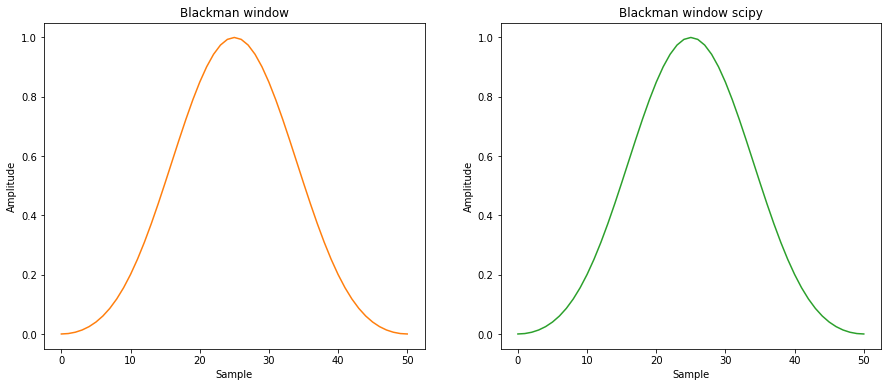

In [64]:
black_win = []
# black_win = np.blackman(M)
for n in range(M):
    win = 0.42 - 0.5*np.cos(2*np.pi*n/M) + 0.08*np.cos(4*np.pi*n/M)
    black_win.append(win)

window = signal.windows.blackman(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(black_win, 'tab:orange')
ax1.set_title("Blackman window")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Sample")
ax2.plot(window, 'tab:green')
ax2.set_title("Blackman window scipy")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Sample")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


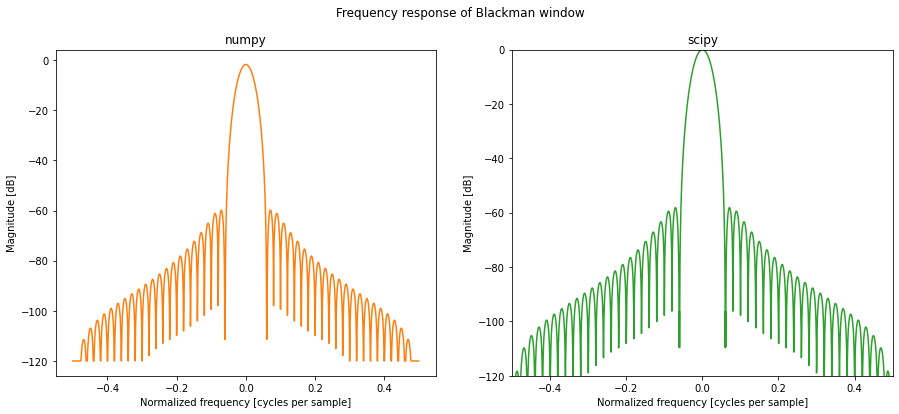

In [65]:
A = fft(black_win, 2048) / 25.5
mag = np.abs(fftshift(A))
freq1 = np.linspace(-0.5, 0.5, len(A))
# with np.errstate(divide='ignore'):
#     response = 20 * np.log10(mag)
response1 = 20 * np.log10(mag)
response1 = np.clip(response1, -120, 120)

A = fft(window, 2048) / (len(window)/2.0)
freq2 = np.linspace(-0.5, 0.5, len(A))
response2 = np.abs(fftshift(A / abs(A).max()))
response2 = 20 * np.log10(np.maximum(response2, 1e-10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(freq1, response1, 'tab:orange')
fig.suptitle('Frequency response of Blackman window')
ax1.set_title("numpy")
ax1.set_ylabel("Magnitude [dB]")
ax1.set_xlabel("Normalized frequency [cycles per sample]")
ax2.plot(freq2, response2, 'tab:green')
ax2.set_title("scipy")
ax2.set_ylabel("Magnitude [dB]")
ax2.set_xlabel("Normalized frequency [cycles per sample]")
ax2.axis([-0.5, 0.5, -120, 0])
plt.show()

## **Hamming window**

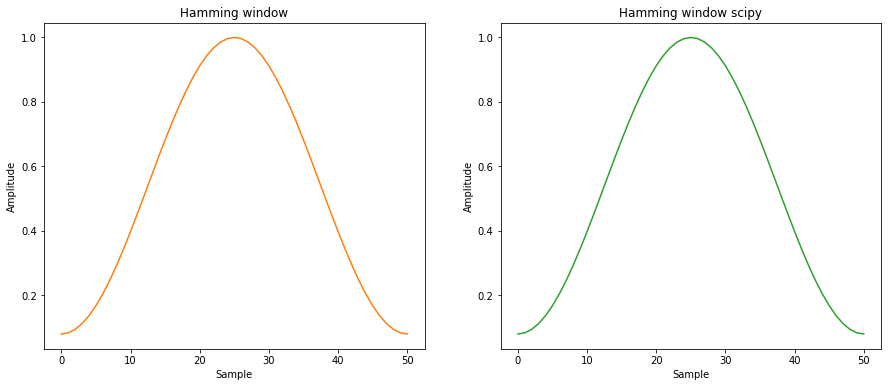

In [66]:
hamming_win = []
# hamming_win = np.hamming(M)
for n in range(M):
    win = 0.54 - 0.46*np.cos(2*np.pi*n/(M-1))
    hamming_win.append(win)

window = signal.windows.hamming(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(hamming_win, 'tab:orange')
ax1.set_title("Hamming window")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Sample")
ax2.plot(window, 'tab:green')
ax2.set_title("Hamming window scipy")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Sample")
plt.show()

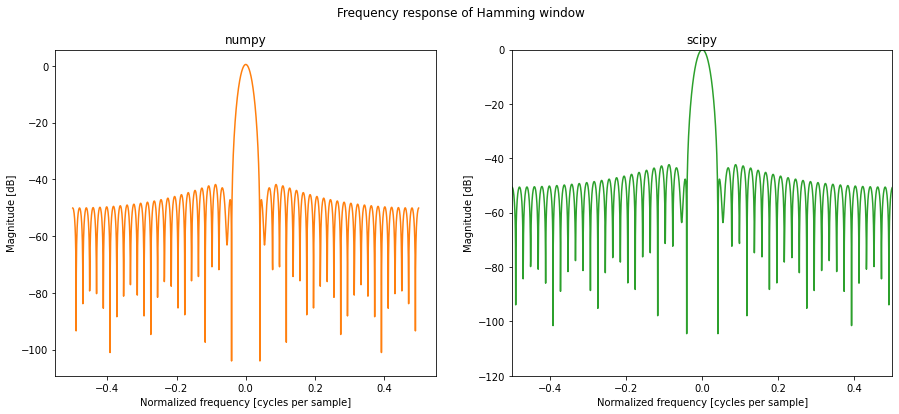

In [67]:
A = fft(hamming_win, 2048) / 25.5
mag = np.abs(fftshift(A))
freq1 = np.linspace(-0.5, 0.5, len(A))
response1 = 20 * np.log10(mag)
response1 = np.clip(response1, -120, 100)

A = fft(window, 2048) / (len(window)/2.0)
freq2 = np.linspace(-0.5, 0.5, len(A))
response2 = np.abs(fftshift(A / abs(A).max()))
response2 = 20 * np.log10(np.maximum(response2, 1e-10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(freq1, response1, 'tab:orange')
fig.suptitle('Frequency response of Hamming window')
ax1.set_title("numpy")
ax1.set_ylabel("Magnitude [dB]")
ax1.set_xlabel("Normalized frequency [cycles per sample]")
ax2.plot(freq2, response2, 'tab:green')
ax2.set_title("scipy")
ax2.set_ylabel("Magnitude [dB]")
ax2.set_xlabel("Normalized frequency [cycles per sample]")
ax2.axis([-0.5, 0.5, -120, 0])
plt.show()

## **Hann window**

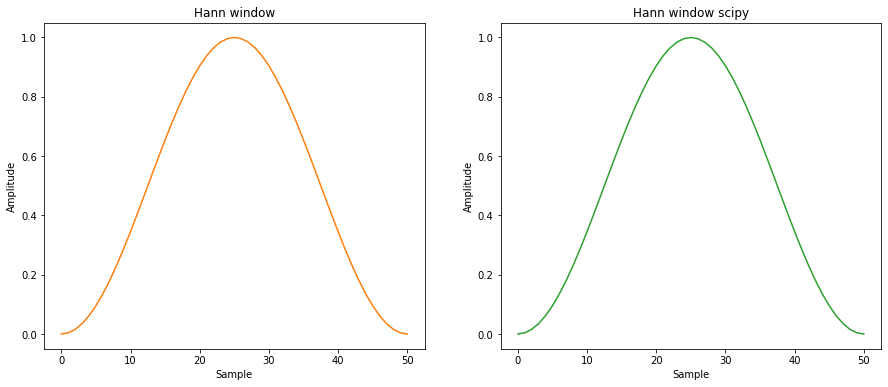

In [68]:
han_win = []
# han_win = np.hanning(M)
for n in range(M):
    win = 0.5 - 0.5*np.cos(2*np.pi*n/(M-1))
    han_win.append(win)

window = signal.windows.hann(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(han_win, 'tab:orange')
ax1.set_title("Hann window")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Sample")
ax2.plot(window, 'tab:green')
ax2.set_title("Hann window scipy")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Sample")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


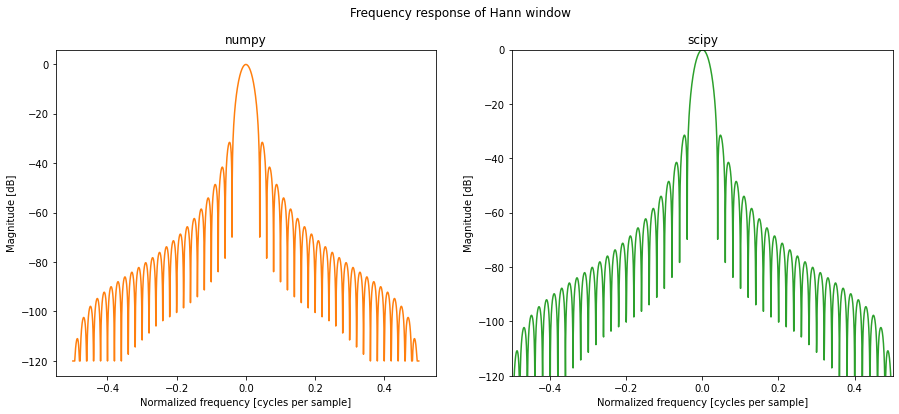

In [69]:
A = fft(han_win, 2048) / 25.5
mag = np.abs(fftshift(A))
freq1 = np.linspace(-0.5, 0.5, len(A))
response1 = 20 * np.log10(mag)
response1 = np.clip(response1, -120, 100)

A = fft(window, 2048) / (len(window)/2.0)
freq2 = np.linspace(-0.5, 0.5, len(A))
response2 = np.abs(fftshift(A / abs(A).max()))
response2 = 20 * np.log10(np.maximum(response2, 1e-10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(freq1, response1, 'tab:orange')
fig.suptitle('Frequency response of Hann window')
ax1.set_title("numpy")
ax1.set_ylabel("Magnitude [dB]")
ax1.set_xlabel("Normalized frequency [cycles per sample]")
ax2.plot(freq2, response2, 'tab:green')
ax2.set_title("scipy")
ax2.set_ylabel("Magnitude [dB]")
ax2.set_xlabel("Normalized frequency [cycles per sample]")
ax2.axis([-0.5, 0.5, -120, 0])
plt.show()